Anxiety, Stress, and Depression Detection

### ANXIETY

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
#splittin the data in train and test sets
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/chapter/data.csv', sep='\t', low_memory=False)

In [ ]:
#changing the response values from range 1-4 to 0-3 for the Dass 42 scales
for i in range(0,124):
    data.iloc[:, i] = data.iloc[:, i].replace([4, 3, 2, 1],[3, 2, 1, 0])
    i = i+3

In [ ]:
modelData= data[['Q1A','Q6A','Q8A','Q11A','Q12A','Q14A','Q18A','Q22A','Q27A','Q29A','Q32A','Q33A','Q35A','Q39A',
"Q2A","Q4A","Q7A","Q9A","Q15A","Q19A","Q20A","Q23A","Q25A","Q28A","Q30A","Q36A","Q40A","Q41A","Q3A","Q5A","Q10A","Q13A","Q16A","Q17A","Q21A","Q24A","Q26A","Q31A","Q34A","Q37A","Q38A","Q42A"]]

In [ ]:
modelData["Anxiety"]=modelData.sum(axis=1)
modelData["Stress"]=modelData["Anxiety"]
modelData["Depression"]=modelData["Anxiety"]
modelData.head()

<ipython-input-5-a6cc2cd33a8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modelData["Anxiety"]=modelData.sum(axis=1)
<ipython-input-5-a6cc2cd33a8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modelData["Stress"]=modelData["Anxiety"]
<ipython-input-5-a6cc2cd33a8d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,...,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Anxiety,Stress,Depression
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,2,0,1,3,101,101,101
1,3,3,3,1,1,3,1,2,2,2,...,1,2,1,1,3,1,1,68,68,68
2,2,2,2,1,0,0,1,2,1,1,...,3,0,3,3,3,3,3,68,68,68
3,1,2,1,1,0,3,0,0,3,2,...,0,1,2,3,1,0,1,49,49,49
4,1,1,3,1,3,3,3,2,1,1,...,1,3,2,3,2,2,2,101,101,101


In [ ]:
modelData["Anxiety"] = modelData["Anxiety"].apply(lambda Anxiety: 0 if Anxiety <=7 else 1)
modelData["Stress"] = modelData["Stress"].apply(lambda stress: 0 if stress <=14 else 1)
modelData["Depression"] = modelData["Depression"].apply(lambda depression: 0 if depression <=9 else 1 )

modelData.head()

<ipython-input-6-4a39b49558dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modelData["Anxiety"] = modelData["Anxiety"].apply(lambda Anxiety: 0 if Anxiety <=7 else 1)
<ipython-input-6-4a39b49558dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modelData["Stress"] = modelData["Stress"].apply(lambda stress: 0 if stress <=14 else 1)
<ipython-input-6-4a39b49558dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,...,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Anxiety,Stress,Depression
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,2,0,1,3,1,1,1
1,3,3,3,1,1,3,1,2,2,2,...,1,2,1,1,3,1,1,1,1,1
2,2,2,2,1,0,0,1,2,1,1,...,3,0,3,3,3,3,3,1,1,1
3,1,2,1,1,0,3,0,0,3,2,...,0,1,2,3,1,0,1,1,1,1
4,1,1,3,1,3,3,3,2,1,1,...,1,3,2,3,2,2,2,1,1,1


In [ ]:
newmodelData=modelData

In [ ]:
YESAN = newmodelData[newmodelData['Anxiety']==1]
NOAN = newmodelData[newmodelData['Anxiety']==0]

from sklearn.utils import resample
df_minority_downsampled = resample(YESAN, replace = False, n_samples = 1206, random_state=42)

from sklearn.utils import shuffle
newmodelData = pd.concat([NOAN, df_minority_downsampled])
newmodelData = shuffle(newmodelData)

In [ ]:
YnewmodelData=newmodelData

In [ ]:
YnewAX = YnewmodelData.drop(columns =[ "Anxiety","Stress","Depression"], axis=1)
YnewAy = YnewmodelData["Anxiety"]

YnewAX_train, YnewAX_test, YnewAY_train, YnewAY_test = train_test_split(YnewAX, YnewAy,
    test_size=0.2, random_state= 8)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
YnewAX_train=sc_X.fit_transform(YnewAX_train)
YnewAX_test=sc_X.transform(YnewAX_test)

training time: 0.139 s
predict time: 0.01 s
training accuracy score is :  0.9751552795031055
Classification report:

               precision    recall  f1-score   support

           0       0.95      1.00      0.98       242
           1       1.00      0.95      0.97       241

    accuracy                           0.98       483
   macro avg       0.98      0.98      0.98       483
weighted avg       0.98      0.98      0.98       483


Confusion Matrix:



<Axes: >

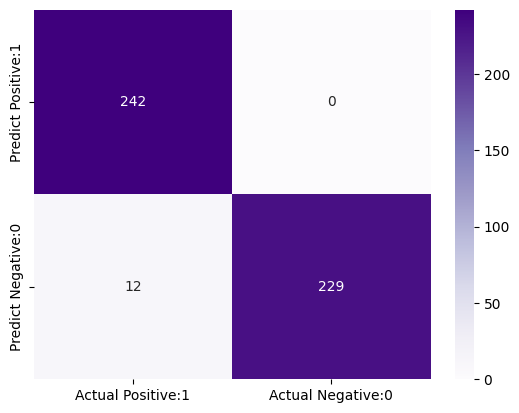

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from time import time
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

extra_classifier=ExtraTreesClassifier()
t0=time()
extra_classifier.fit(YnewAX_train,YnewAY_train)
t1=time()
print ("training time:", round(time()-t0, 3), "s")
YnewAy_predA=extra_classifier.predict(YnewAX_test)
print ("predict time:", round(time()-t1, 3), "s")

print("training accuracy score is : ",accuracy_score(YnewAY_test,YnewAy_predA))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
APYnewAclass_report = classification_report(YnewAY_test, YnewAy_predA)
APYnewAconf_matrix = confusion_matrix(YnewAY_test,YnewAy_predA)
APYnewAacc = accuracy_score(YnewAY_test,YnewAy_predA)

APYnewAconf_mat = pd.DataFrame(confusion_matrix(YnewAY_test, YnewAy_predA),
                        columns=["Pred.Negative", "Pred.Positive"],
                        index=['Act.Negative', "Act.Positive"])

print("Classification report:\n\n", APYnewAclass_report)

# visualize confusion matrix with seaborn heatmap
print("\nConfusion Matrix:\n")
APYnewAcm_matrix = pd.DataFrame(data=APYnewAconf_matrix, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(APYnewAcm_matrix, annot=True, fmt='d', cmap='Purples')

In [ ]:
APYnewAacc

0.9751552795031055

In [ ]:
print("hello")

hello


### STRESS

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/chapter/data.csv', sep='\t', low_memory=False)

In [ ]:
#changing the response values from range 1-4 to 0-3 for the Dass 42 scales
for i in range(0,124):
    data.iloc[:, i] = data.iloc[:, i].replace([4, 3, 2, 1],[3, 2, 1, 0])
    i = i+3

In [ ]:
modelData= data[['Q1A','Q6A','Q8A','Q11A','Q12A','Q14A','Q18A','Q22A','Q27A','Q29A','Q32A','Q33A','Q35A','Q39A',
"Q2A","Q4A","Q7A","Q9A","Q15A","Q19A","Q20A","Q23A","Q25A","Q28A","Q30A","Q36A","Q40A","Q41A","Q3A","Q5A","Q10A","Q13A","Q16A","Q17A","Q21A","Q24A","Q26A","Q31A","Q34A","Q37A","Q38A","Q42A"]]

In [ ]:
modelData["Anxiety"]=modelData.sum(axis=1)
modelData["Stress"]=modelData["Anxiety"]
modelData["Depression"]=modelData["Anxiety"]
modelData.head()

<ipython-input-20-a6cc2cd33a8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modelData["Anxiety"]=modelData.sum(axis=1)
<ipython-input-20-a6cc2cd33a8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modelData["Stress"]=modelData["Anxiety"]
<ipython-input-20-a6cc2cd33a8d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,...,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Anxiety,Stress,Depression
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,2,0,1,3,101,101,101
1,3,3,3,1,1,3,1,2,2,2,...,1,2,1,1,3,1,1,68,68,68
2,2,2,2,1,0,0,1,2,1,1,...,3,0,3,3,3,3,3,68,68,68
3,1,2,1,1,0,3,0,0,3,2,...,0,1,2,3,1,0,1,49,49,49
4,1,1,3,1,3,3,3,2,1,1,...,1,3,2,3,2,2,2,101,101,101


In [ ]:
modelData["Anxiety"] = modelData["Anxiety"].apply(lambda Anxiety: 0 if Anxiety <=7 else 1)
modelData["Stress"] = modelData["Stress"].apply(lambda stress: 0 if stress <=14 else 1)
modelData["Depression"] = modelData["Depression"].apply(lambda depression: 0 if depression <=9 else 1 )

modelData.head()

<ipython-input-21-4a39b49558dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modelData["Anxiety"] = modelData["Anxiety"].apply(lambda Anxiety: 0 if Anxiety <=7 else 1)
<ipython-input-21-4a39b49558dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modelData["Stress"] = modelData["Stress"].apply(lambda stress: 0 if stress <=14 else 1)
<ipython-input-21-4a39b49558dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,...,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Anxiety,Stress,Depression
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,2,0,1,3,1,1,1
1,3,3,3,1,1,3,1,2,2,2,...,1,2,1,1,3,1,1,1,1,1
2,2,2,2,1,0,0,1,2,1,1,...,3,0,3,3,3,3,3,1,1,1
3,1,2,1,1,0,3,0,0,3,2,...,0,1,2,3,1,0,1,1,1,1
4,1,1,3,1,3,3,3,2,1,1,...,1,3,2,3,2,2,2,1,1,1


In [ ]:
newmodelData=modelData

In [ ]:
YESAN = newmodelData[newmodelData['Stress']==1]
NOAN = newmodelData[newmodelData['Stress']==0]

from sklearn.utils import resample
df_minority_downsampled = resample(YESAN, replace = False, n_samples = 2961, random_state=42)

from sklearn.utils import shuffle
newmodelData = pd.concat([NOAN, df_minority_downsampled])
newmodelData = shuffle(newmodelData)

In [ ]:
YnewmodelData=newmodelData

In [ ]:
YnewAX = YnewmodelData.drop(columns =[ "Anxiety","Stress","Depression"], axis=1)
YnewAy = YnewmodelData["Stress"]

YnewAX_train, YnewAX_test, YnewAY_train, YnewAY_test = train_test_split(YnewAX, YnewAy,
    test_size=0.2, random_state= 8)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
YnewAX_train=sc_X.fit_transform(YnewAX_train)
YnewAX_test=sc_X.transform(YnewAX_test)

training time: 0.285 s
predict time: 0.018 s
training accuracy score is :  0.9713080168776371
Classification report:

               precision    recall  f1-score   support

           0       0.95      1.00      0.97       597
           1       1.00      0.94      0.97       588

    accuracy                           0.97      1185
   macro avg       0.97      0.97      0.97      1185
weighted avg       0.97      0.97      0.97      1185


Confusion Matrix:



<Axes: >

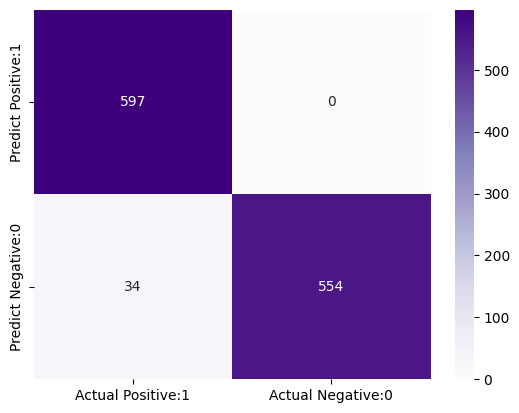

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from time import time
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

extra_classifier=ExtraTreesClassifier()
t0=time()
extra_classifier.fit(YnewAX_train,YnewAY_train)
t1=time()
print ("training time:", round(time()-t0, 3), "s")
YnewAy_predA=extra_classifier.predict(YnewAX_test)
print ("predict time:", round(time()-t1, 3), "s")

print("training accuracy score is : ",accuracy_score(YnewAY_test,YnewAy_predA))
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
APYnewAclass_report = classification_report(YnewAY_test, YnewAy_predA)
APYnewAconf_matrix = confusion_matrix(YnewAY_test,YnewAy_predA)
APYnewAacc = accuracy_score(YnewAY_test,YnewAy_predA)

APYnewAconf_mat = pd.DataFrame(confusion_matrix(YnewAY_test, YnewAy_predA),
                        columns=["Pred.Negative", "Pred.Positive"],
                        index=['Act.Negative', "Act.Positive"])

print("Classification report:\n\n", APYnewAclass_report)

# visualize confusion matrix with seaborn heatmap
print("\nConfusion Matrix:\n")
APYnewAcm_matrix = pd.DataFrame(data=APYnewAconf_matrix, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(APYnewAcm_matrix, annot=True, fmt='d', cmap='Purples')

In [ ]:
APYnewAacc

0.9713080168776371

### Depression

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/chapter/data.csv', sep='\t', low_memory=False)

In [ ]:
#changing the response values from range 1-4 to 0-3 for the Dass 42 scales
for i in range(0,124):
    data.iloc[:, i] = data.iloc[:, i].replace([4, 3, 2, 1],[3, 2, 1, 0])
    i = i+3

In [ ]:
modelData= data[['Q1A','Q6A','Q8A','Q11A','Q12A','Q14A','Q18A','Q22A','Q27A','Q29A','Q32A','Q33A','Q35A','Q39A',
"Q2A","Q4A","Q7A","Q9A","Q15A","Q19A","Q20A","Q23A","Q25A","Q28A","Q30A","Q36A","Q40A","Q41A","Q3A","Q5A","Q10A","Q13A","Q16A","Q17A","Q21A","Q24A","Q26A","Q31A","Q34A","Q37A","Q38A","Q42A"]]

In [ ]:
modelData["Anxiety"]=modelData.sum(axis=1)
modelData["Stress"]=modelData["Anxiety"]
modelData["Depression"]=modelData["Anxiety"]

<ipython-input-51-19cd8a47726a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modelData["Anxiety"]=modelData.sum(axis=1)
<ipython-input-51-19cd8a47726a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modelData["Stress"]=modelData["Anxiety"]
<ipython-input-51-19cd8a47726a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [ ]:
modelData["Anxiety"] = modelData["Anxiety"].apply(lambda Anxiety: 0 if Anxiety <=7 else 1)
modelData["Stress"] = modelData["Stress"].apply(lambda stress: 0 if stress <=14 else 1)
modelData["Depression"] = modelData["Depression"].apply(lambda depression: 0 if depression <=9 else 1 )

modelData.head()

<ipython-input-52-4a39b49558dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modelData["Anxiety"] = modelData["Anxiety"].apply(lambda Anxiety: 0 if Anxiety <=7 else 1)
<ipython-input-52-4a39b49558dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modelData["Stress"] = modelData["Stress"].apply(lambda stress: 0 if stress <=14 else 1)
<ipython-input-52-4a39b49558dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,...,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Anxiety,Stress,Depression
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,2,0,1,3,1,1,1
1,3,3,3,1,1,3,1,2,2,2,...,1,2,1,1,3,1,1,1,1,1
2,2,2,2,1,0,0,1,2,1,1,...,3,0,3,3,3,3,3,1,1,1
3,1,2,1,1,0,3,0,0,3,2,...,0,1,2,3,1,0,1,1,1,1
4,1,1,3,1,3,3,3,2,1,1,...,1,3,2,3,2,2,2,1,1,1


In [ ]:
newmodelData=modelData

In [ ]:
YESAN = newmodelData[newmodelData['Depression']==1]
NOAN = newmodelData[newmodelData['Depression']==0]

from sklearn.utils import resample
df_minority_downsampled = resample(YESAN, replace = False, n_samples = 1662, random_state=42)

from sklearn.utils import shuffle
newmodelData = pd.concat([NOAN, df_minority_downsampled])
newmodelData = shuffle(newmodelData)

In [ ]:
YnewmodelData=newmodelData

In [ ]:
YnewAX = YnewmodelData.drop(columns =[ "Anxiety","Stress","Depression"], axis=1)
YnewAy = YnewmodelData["Depression"]

YnewAX_train, YnewAX_test, YnewAY_train, YnewAY_test = train_test_split(YnewAX, YnewAy,
    test_size=0.2, random_state= 8)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
YnewAX_train=sc_X.fit_transform(YnewAX_train)
YnewAX_test=sc_X.transform(YnewAX_test)

training time: 0.185 s
predict time: 0.012 s
training accuracy score is :  0.9759398496240601
Classification report:

               precision    recall  f1-score   support

           0       0.95      1.00      0.98       338
           1       1.00      0.95      0.97       327

    accuracy                           0.98       665
   macro avg       0.98      0.98      0.98       665
weighted avg       0.98      0.98      0.98       665


Confusion Matrix:



<Axes: >

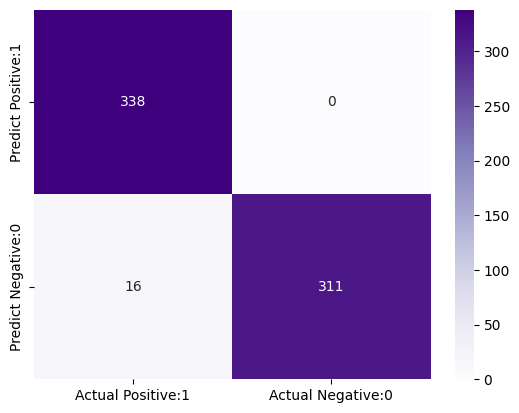

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from time import time
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

extra_classifier=ExtraTreesClassifier()
t0=time()
extra_classifier.fit(YnewAX_train,YnewAY_train)
t1=time()
print ("training time:", round(time()-t0, 3), "s")
YnewAy_predA=extra_classifier.predict(YnewAX_test)
print ("predict time:", round(time()-t1, 3), "s")

print("training accuracy score is : ",accuracy_score(YnewAY_test,YnewAy_predA))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
APYnewAclass_report = classification_report(YnewAY_test, YnewAy_predA)
APYnewAconf_matrix = confusion_matrix(YnewAY_test,YnewAy_predA)
APYnewAacc = accuracy_score(YnewAY_test,YnewAy_predA)

APYnewAconf_mat = pd.DataFrame(confusion_matrix(YnewAY_test, YnewAy_predA),
                        columns=["Pred.Negative", "Pred.Positive"],
                        index=['Act.Negative', "Act.Positive"])

print("Classification report:\n\n", APYnewAclass_report)

# visualize confusion matrix with seaborn heatmap
print("\nConfusion Matrix:\n")
APYnewAcm_matrix = pd.DataFrame(data=APYnewAconf_matrix, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(APYnewAcm_matrix, annot=True, fmt='d', cmap='Purples')

In [ ]:
APYnewAacc

0.9759398496240601